# 📈 Customer Acquisition Modeling: Geometric Distribution Project

# 1. Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter
import scipy.stats as stats

# 2. Simulate Customer Touchpoint Data

In [51]:

np.random.seed(42)

# Business assumption: 8% success per contact attempt
p_success = 0.08
n_customers = 10000

touchpoints = np.random.geometric(p_success, n_customers)

df = pd.DataFrame({
    'Customer_ID': range(1, n_customers + 1),
    'Touchpoints_To_Convert': touchpoints
})

df.head()

,Customer_ID,Touchpoints_To_Convert
0,1,6
1,2,37
2,3,16
3,4,11
4,5,3


# 3. Exploratory Data Analysis (EDA)

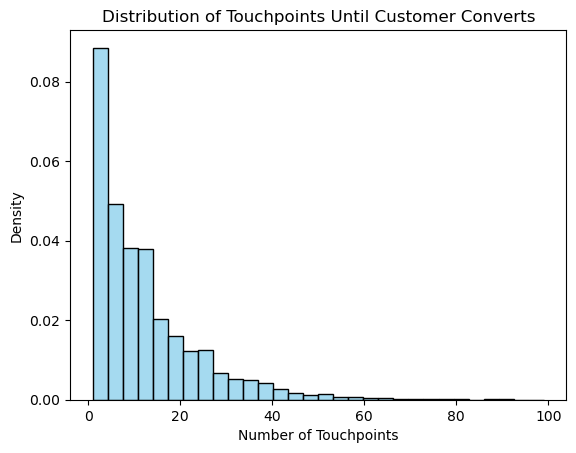

count    10000.000000
mean        12.233700
std         11.684585
min          1.000000
25%          4.000000
50%          9.000000
75%         17.000000
max         99.000000
Name: Touchpoints_To_Convert, dtype: float64


In [54]:
sns.histplot(df['Touchpoints_To_Convert'], bins=30, stat="density", color="skyblue")
plt.title("Distribution of Touchpoints Until Customer Converts")
plt.xlabel("Number of Touchpoints")
plt.ylabel("Density")
plt.show()

print(df['Touchpoints_To_Convert'].describe())

# 4. Manual Estimation of p

In [57]:
manual_p = 1 / df['Touchpoints_To_Convert'].mean()
print(f"Manual Estimated p: {manual_p:.4f}")


Manual Estimated p: 0.0817


# 7. Business Insights

Average Cost per Acquisition (CAC): $12.23


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_12660\802792276.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df, palette='viridis')


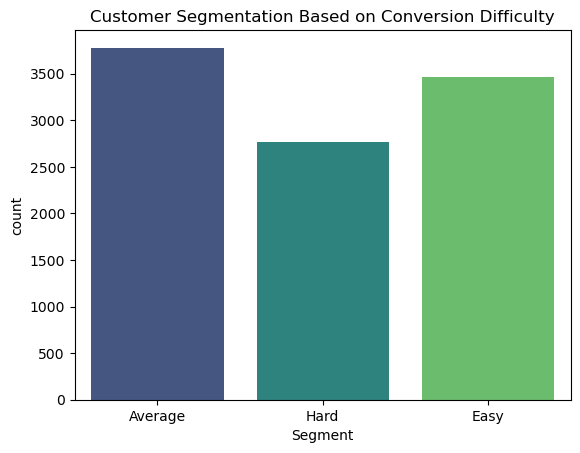

Segment
Average    37.78
Easy       34.59
Hard       27.63
Name: proportion, dtype: float64


In [60]:
# Cost Analysis
cost_per_ad = 1  # Assume $1 per ad exposure
average_cost_per_conversion = df['Touchpoints_To_Convert'].mean() * cost_per_ad
print(f"Average Cost per Acquisition (CAC): ${average_cost_per_conversion:.2f}")

# Customer Segmentation based on touchpoints
def segment_customer(touches):
    if touches <= 5:
        return 'Easy'
    elif touches <= 15:
        return 'Average'
    else:
        return 'Hard'

df['Segment'] = df['Touchpoints_To_Convert'].apply(segment_customer)

# Plot Segments
sns.countplot(x='Segment', data=df, palette='viridis')
plt.title('Customer Segmentation Based on Conversion Difficulty')
plt.show()

# Show segment breakdown
print(df['Segment'].value_counts(normalize=True) * 100)


# 8. Recommendations

In [63]:
print("\nBusiness Recommendations:")
print("- Focus budget on customers converting within 5-15 touchpoints.")
print("- Set a hard stop after 20 touchpoints to avoid wasting ad spend.")
print("- Consider multi-channel strategy for 'Hard' customers.")


Business Recommendations:
- Focus budget on customers converting within 5-15 touchpoints.
- Set a hard stop after 20 touchpoints to avoid wasting ad spend.
- Consider multi-channel strategy for 'Hard' customers.
